In [1]:
from utils.denoising_utils import *
from utils.fusion_index import *
from sporco.util import tikhonov_filter
import pywt
import numpy as npy
import matplotlib.pyplot as plt
import matplotlib.cm
from scipy import linalg as la
from PIL import Image

In [2]:
def Fusion_DWT_db2(image1, image2):
    # decomposing each image using Discrete wavelet transform(DWT) with Daubechies filter (db2)
    coefficients_1 = pywt.wavedec2(image1, 'db2', level=2)
    coefficients_2 = pywt.wavedec2(image2, 'db2', level=2)
    # creating variables to be used
    coefficients_h = list(coefficients_1)
    # fusing the decomposed image data
    coefficients_h[0] = (coefficients_1[0] + coefficients_2[0]) * 0.5
    # creating variables to be used
    temp1 = list(coefficients_1[1])
    temp2 = list(coefficients_2[1])
    temp3 = list(coefficients_h[1])
    # fusing the decomposed image data
    temp3[0] = (temp1[0] + temp2[0]) * 0.5
    temp3[1] = (temp1[1] + temp2[1]) * 0.5
    temp3[2] = (temp1[2] + temp2[2]) * 0.5
    coefficients_h[1] = tuple(temp3)
    # Creating fused image by reconstructing the fused decomposed image
    result = pywt.waverec2(coefficients_h, 'db2')
    return result

In [3]:

def lowpass(s, lda, npad):  # In this function, low pass filtering is done by using Tikhonov filter.
    return tikhonov_filter(s, lda, npad)


def signaltonoise(a, axis, ddof):
    a = npy.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return npy.where(sd == 0, 0, m / sd)

In [4]:
fname_us = "C:\\Users\\Leo\\Desktop\\FinalYearProject\\Dataf\\uhr1.jpg"
fname_mr = "C:\\Users\\Leo\\Desktop\\FinalYearProject\\Dataf\\uhr2.jpg"
fname_original = "C:\\Users\\Leo\\Desktop\\FinalYearProject\\Dataf\\kid.png"
print(fname_us)
print(fname_mr)

C:\Users\Leo\Desktop\FinalYearProject\Dataf\uhr1.jpg
C:\Users\Leo\Desktop\FinalYearProject\Dataf\uhr2.jpg


In [5]:
us_pil = get_gray_image(fname_us,-1)[0]
us_pil = us_pil.resize((512,512),Image.ANTIALIAS)
us_np = pil_to_np(us_pil)
# us_pil.show()
mr_pil = get_gray_image(fname_mr,-1)[0]
mr_pil = mr_pil.resize((512,512),Image.ANTIALIAS)
mr_np = pil_to_np(mr_pil)
original_pil = crop_image(get_gray_image(fname_original,-1)[0],d=32)
# original_pil.show()
original_np = pil_to_np(original_pil)


(512, 512)


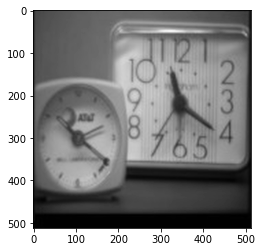

In [6]:
img = Fusion_DWT_db2(us_pil,mr_pil)
print(img.shape)
plt.imshow(img,cmap = matplotlib.cm.gray)

In [7]:
print(find_fusion_index(us_pil,mr_pil,img))

0.9638699908000374


In [8]:
plt.imsave("WLT_remote_fusion_outfocus.jpg",img,cmap='gray')